## Better looping so that parallel job is better

Experimental design:  
We design the task for collecting accuracy performance of ARIMA stock price forecasting method.  

Control Factors:  
1. ARIMA orders x 5: (3,1,0), (4,1,0), (3,0,0), (1,0,0), (1,0,1)  
2. History window x 5: {10, 15, 30, 50, 100} days  
3. Forecast horizon x 6: {1, 3, 5, 7, 14, 30} days  
4. Data transformation or normalization (scaling) x 3: None, MinMaxScaler, StandardScaler 

Several choices of data scaling available from sklearn.   
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [2]:
import multiprocessing as mp
import itertools
from sklearn.preprocessing import MinMaxScaler, StandardScaler


HPARAM = [(3,1,0), (4,1,0), (3,0,0), (1,0,0), (0,0,3)]
HISTORY = [10, 15, 30, 50, 100]
HORIZON = [1, 3, 5, 7, 14, 30]
DTRANSFORM = ['none', 'minmax', 'standard']

treatments = []

for tfactor in itertools.product(HPARAM, HISTORY, HORIZON, DTRANSFORM):
    treatments.append(tfactor)

In [3]:
len(treatments)

450

In [4]:
treatments

[((3, 1, 0), 10, 1, 'none'),
 ((3, 1, 0), 10, 1, 'minmax'),
 ((3, 1, 0), 10, 1, 'standard'),
 ((3, 1, 0), 10, 3, 'none'),
 ((3, 1, 0), 10, 3, 'minmax'),
 ((3, 1, 0), 10, 3, 'standard'),
 ((3, 1, 0), 10, 5, 'none'),
 ((3, 1, 0), 10, 5, 'minmax'),
 ((3, 1, 0), 10, 5, 'standard'),
 ((3, 1, 0), 10, 7, 'none'),
 ((3, 1, 0), 10, 7, 'minmax'),
 ((3, 1, 0), 10, 7, 'standard'),
 ((3, 1, 0), 10, 14, 'none'),
 ((3, 1, 0), 10, 14, 'minmax'),
 ((3, 1, 0), 10, 14, 'standard'),
 ((3, 1, 0), 10, 30, 'none'),
 ((3, 1, 0), 10, 30, 'minmax'),
 ((3, 1, 0), 10, 30, 'standard'),
 ((3, 1, 0), 15, 1, 'none'),
 ((3, 1, 0), 15, 1, 'minmax'),
 ((3, 1, 0), 15, 1, 'standard'),
 ((3, 1, 0), 15, 3, 'none'),
 ((3, 1, 0), 15, 3, 'minmax'),
 ((3, 1, 0), 15, 3, 'standard'),
 ((3, 1, 0), 15, 5, 'none'),
 ((3, 1, 0), 15, 5, 'minmax'),
 ((3, 1, 0), 15, 5, 'standard'),
 ((3, 1, 0), 15, 7, 'none'),
 ((3, 1, 0), 15, 7, 'minmax'),
 ((3, 1, 0), 15, 7, 'standard'),
 ((3, 1, 0), 15, 14, 'none'),
 ((3, 1, 0), 15, 14, 'minmax'),
 (

In [5]:
from SET50_arima_errors import get_series, collect_forecast_perf

In [6]:
ticker = 'AOT'
df = get_series(ticker)
df.head()

,High,Low,Open,Close,Volume,Adj Close,Date,Daily Return,t,y_true
1,14.95,14.25,14.30,14.50,121443000.0,8.114254,2014-01-03,-0.010292,1,8.114254
2,14.40,13.75,14.40,14.25,103236000.0,7.974353,2014-01-06,-0.017392,2,7.974353
3,15.15,14.35,14.40,15.15,112178000.0,8.477996,2014-01-07,0.061244,3,8.477996
4,15.10,14.50,15.05,14.50,105933000.0,8.114254,2014-01-08,-0.043852,4,8.114254
5,14.95,14.55,14.70,14.60,77090000.0,8.170215,2014-01-09,0.006873,5,8.170215


In [7]:
## To add feature or debug, go fix collect_forecast_perf in SET50_arima_errors.py

index 0 is out of bounds for axis 0 with size 0
MAPE: 0.01207
Batches Tried: 1470


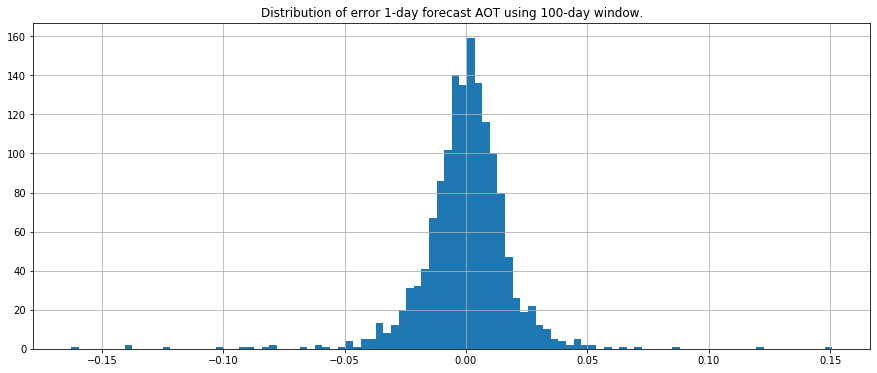

In [8]:
pred_res = collect_forecast_perf(ticker,df)

In [9]:
pred_res.head()

,Actual,Error (Pct),Period,Predict,Prediction Made For,Present Date,history_window_end,history_window_start,prediction_for_day,prediction_made_on,MAPE,MSE,batches_tried,observations
0,10.884293,-0.018715,"(0, 101)",10.680598,101.0,100.0,"Index(['2014-06-04'], dtype='object')","Index(['2014-01-03'], dtype='object')","Index(['2014-06-05'], dtype='object')","Index(['2014-06-05'], dtype='object')",0.012068,0.74265,1470,1572
1,10.912272,-0.003412,"(1, 102)",10.875044,102.0,101.0,"Index(['2014-06-05'], dtype='object')","Index(['2014-01-06'], dtype='object')","Index(['2014-06-06'], dtype='object')","Index(['2014-06-06'], dtype='object')",0.012068,0.74265,1470,1572
2,10.912272,-0.000640,"(2, 103)",10.905289,103.0,102.0,"Index(['2014-06-06'], dtype='object')","Index(['2014-01-07'], dtype='object')","Index(['2014-06-09'], dtype='object')","Index(['2014-06-09'], dtype='object')",0.012068,0.74265,1470,1572
3,10.940254,-0.001890,"(3, 104)",10.919577,104.0,103.0,"Index(['2014-06-09'], dtype='object')","Index(['2014-01-08'], dtype='object')","Index(['2014-06-10'], dtype='object')","Index(['2014-06-10'], dtype='object')",0.012068,0.74265,1470,1572
4,10.968234,0.000114,"(4, 105)",10.969487,105.0,104.0,"Index(['2014-06-10'], dtype='object')","Index(['2014-01-09'], dtype='object')","Index(['2014-06-11'], dtype='object')","Index(['2014-06-11'], dtype='object')",0.012068,0.74265,1470,1572


In [ ]:
import pandas as pd
AOT = get_series('AOT')
str(pd.to_datetime(AOT[0:1]['Date'].values[0]).strftime('%Y-%m-%d'))